# Genetic Algorithms

In [47]:
import numpy as np
import matplotlib.pyplot as plt

In [48]:
def objective_function(x, y):
	return (x - 3 * y + 1) / (3 * x**2 + 3*y**2 + 1)

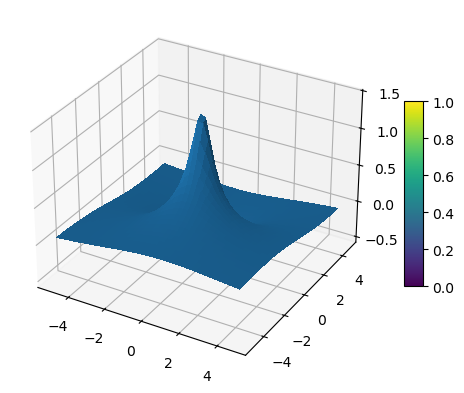

In [49]:
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

X = np.arange(-5, 5, 0.25)
Y = np.arange(-5, 5, 0.25)
X, Y = np.meshgrid(X, Y)
Z = objective_function(X, Y)
surf = ax.plot_surface(X, Y, Z, rstride=1, cstride=1,
                       linewidth=0, antialiased=False)

fig.colorbar(surf, shrink=0.5, aspect=10)

In [50]:
def fitness(z):
	return sum(z)

In [51]:
def crossover(parentX, parentY, sortedId):
	X = [0 for i in range(4)]
	Y = [0 for i in range(4)]

	X[2] = parentX[sortedId[2]]
	X[3] = parentX[sortedId[2]]

	X[0] = parentX[sortedId[0]]

	X[1] = parentX[sortedId[1]]

	Y[0] = parentY[sortedId[2]]
	Y[1] = parentY[sortedId[2]]

	Y[2] = parentY[sortedId[0]]

	Y[3] = parentY[sortedId[1]]

	return X, Y

In [52]:
def sorting(Z):
	return sorted(range(len(Z)), key=lambda k: Z[k])

In [53]:
def evoStep(X, Y, Z):
	_, minId = min((value, id) for (id, value) in enumerate(Z))
	X = X[:]
	Y = Y[:]
	Z = Z[:]

	X.pop(minId)
	Y.pop(minId)
	Z.pop(minId)

	return X, Y, Z

In [54]:
def evoSteps(X, Y, stepsNum=4):
	results = []

	for i in range(stepsNum):
		arrZ = [objective_function(x, Y[i]) for i, x in enumerate(X)]

		X, Y, Z = evoStep(X, Y, arrZ)

		X, Y = crossover(X, Y, sorting(Z))

		results.append([X, Y, fitness(arrZ), arrZ])

		return X, Y, results

In [55]:
X = [-2, -1, 0, 1]
Y = [-2, -1, 0, 1]

results = evoSteps(X, Y)

In [56]:
for i in range(len(results[2])):
	print(f'max_{i + 1}_step: {results[2][i][2]}')

qualityArrZ = []
for i in range(len(results[2])):
	qualityArrZ += results[2][i][3]

print(f'max Z: {max(qualityArrZ)}')

max_1_step: 1.4857142857142858
max Z: 1.0


## Simulated annealing

In [57]:
import networkx as nx
from math import e

In [59]:
distances = [
	(1, 2, 20),
	(1, 3, 40),
	(1, 4, 41),
	(1, 5, 33),
	(1, 6, 21),
	(2, 3, 26),
	(2, 4, 38),
	(2, 5, 42),
	(2, 6, 17),
	(3, 4, 22),
	(3, 5, 43),
	(3, 6, 21),
	(4, 5, 27),
	(4, 6, 22),
	(5, 6, 26)
]

V = [1, 4, 5, 2, 6, 3, 1]
Z = [
	(3, 4),
	(4, 6),
	(5, 2),
	(6, 2)
]
P = [49, 54, 43, 54]

T = 100

In [60]:
def probability(delta, T):
	return 100 * e**(-delta / T)

In [61]:
def reduceTemp(prevT):
	return 0.5 * prevT

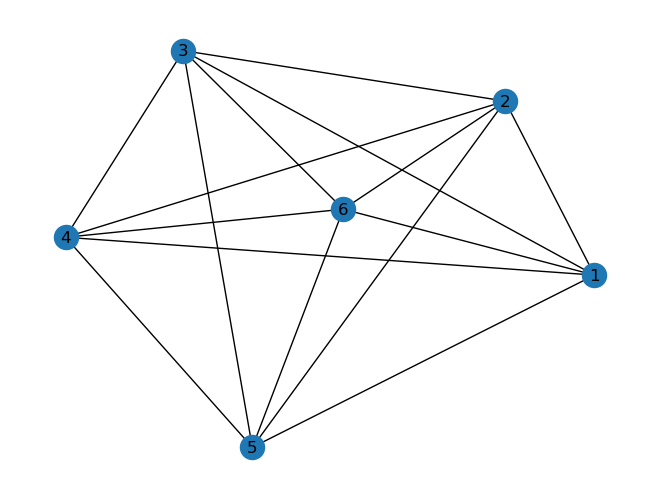

In [63]:
graph = nx.Graph()
graph.add_weighted_edges_from(distances)

nx.draw_kamada_kawai(graph, with_labels=True)

In [64]:
def edgeLength(i, j, distances, roundTrip=True):
	if roundTrip:
		return max([(item[2] if (item[0] == i and item[1] == j) or (item[1] == i and item[0] == j) else -1) for item in distances])
	return max([(item[2] if (item[0] == i and item[1] == j) else -1) for item in distances])

In [65]:
def routeLength(V, distances):
	edges = []

	for i in range(len(V) - 1):
		edges.append(edgeLength(V[i], V[i + 1], distances))

	return sum(edges)

In [66]:
def routeOneReplacement(arrV, Z, replacementByName=True):
	decrement = 1 if replacementByName else 0

	arrV[Z[0] - decrement], arrV[Z[1] - decrement] = arrV[Z[1] - decrement], arrV[Z[0] - decrement]

	return arrV

In [67]:
def routeReplacement(V, Z):
	for z in Z:
		V = routeOneReplacement(V, z)

	return V

In [69]:
def chooseRoute(distances, V, Z, T, P):
	sumLength = routeLength(V, distances)
	arrSum = [sumLength]

	for i in range(len(Z)):
		newV = routeOneReplacement(V[:], Z[i])
		newS = routeLength(newV, distances)
		arrSum.append(newS)
		deltaS = newS - sumLength

		if deltaS > 0:
			p = probability(deltaS, T)

			if p > P[i]:
				V = newV
				sumLength = newS
		else:
			V = newV
			sumLength = newS
		T = reduceTemp(T)

	return V, arrSum

In [68]:
def drawRouteGraph(distances, bestRoute):
	newDistances = []

	for i in range(len(bestRoute) - 1):
		for distance in distances:
			if distance[0] == bestRoute[i] and distance[1] == bestRoute[i + 1] or distance[1] == bestRoute[i] and distance[0] == bestRoute[i + 1]:
				newDistances.append(distance)

	graph = nx.Graph()

	graph.add_weighted_edges_from(newDistances)

	nx.draw_kamada_kawai(graph, with_labels=True)

Best route: [1, 6, 2, 3, 4, 5, 1]
Length for the best route: 146
Lengths for all routes: [188, 208, 185, 146, 166]


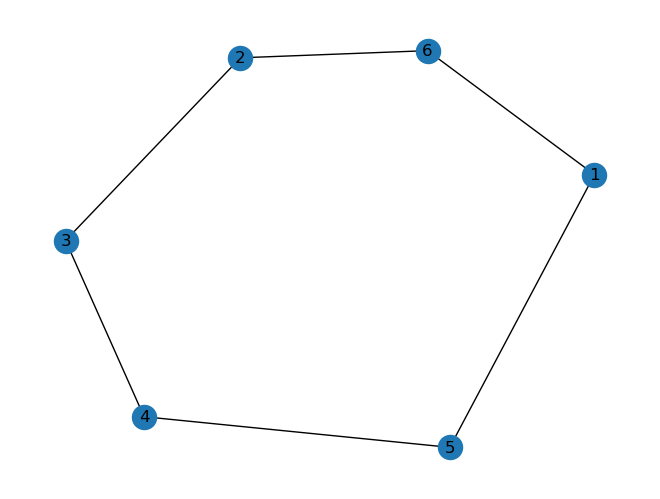

In [71]:
bestRoute, arrLength = chooseRoute(distances, V, Z, T, P)

print(f'Best route: {bestRoute}')
print(f'Length for the best route: {routeLength(bestRoute, distances)}')
print(f'Lengths for all routes: {arrLength}')

drawRouteGraph(distances, bestRoute)